In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


# Computer vision
## Session 13c

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
# Import some libraries
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import cv2

%matplotlib inline

# %matplotlib notebook

In [3]:
# Some basic parameters
inpDir = '../../input'
outDir = '../output'
dataDir = 'basic_operations'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (9, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)

CMAP = 'jet'

LINE_THICK = 1

MARK_COLOR = (15, 82, 186)

## Helper function

In [4]:
# Function to read in a file

def fn_read_image(fileName):
    
    imgPath = os.path.join(inpDir, dataDir, fileName)
    
    im = cv2.imread(imgPath, cv2.IMREAD_COLOR)
    
    
    if im is None:
        print('Could not open or find the image:', fileName)
        exit(0)
    else:
        rbgIm = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
        return im, rbgIm

    
# Function to plot one image

def fn_plot_one_img(im, cmap = CMAP):
    
    '''
    Args:
        im : image to display and save
    
    '''
    # showing image
    plt.imshow(im, cmap = cmap)
    plt.axis('off')
    plt.show()

    
# Function to plot multiple images

def fn_plot_images(im_lst):
    '''
    Args:
        img_list: list of images
    '''
    nRows = 1
    nCols = len(im_lst)
    
    
    fig, axes = plt.subplots(nRows, nCols)
    
    for i in range(nCols):
        axes[i].imshow(im_lst[i]['img'], cmap = im_lst[i]['cmap'])
        axes[i].set_title(im_lst[i]['name'])

        axes[i].set_xticklabels([]);
        axes[i].set_yticklabels([]);

                
    plt.tight_layout()
    
    plt.show()

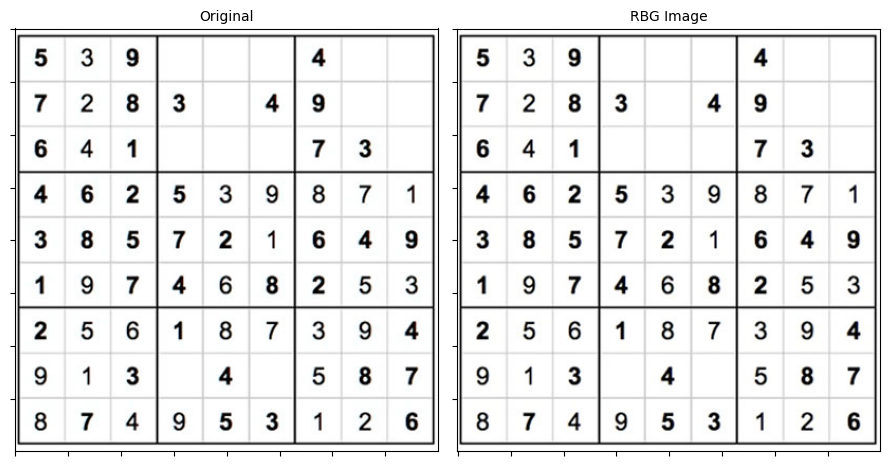

In [5]:
imgFileName = '/home/hpcap/Desktop/modules/Ai/Data/input-20240618T113733Z-001/input/basic_operations/Sudoku-1.jpg'

srcImg, rgbImg = fn_read_image(imgFileName)

img_list = [{'img': srcImg, 'name': 'Original', 'cmap': CMAP}, 
            {'img': rgbImg, 'name': 'RBG Image', 'cmap': CMAP}]

fn_plot_images(img_list)

In [6]:
rgbImg.shape

(400, 400, 3)

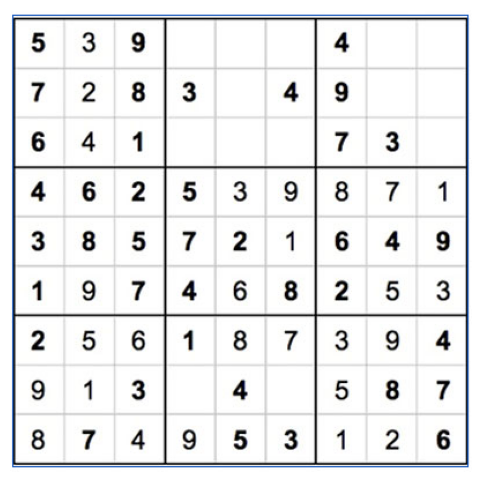

In [7]:
mkdImg = rgbImg.copy()
cv2.rectangle(mkdImg, (2, 4), (396,395), MARK_COLOR, 1)
fn_plot_one_img(mkdImg)

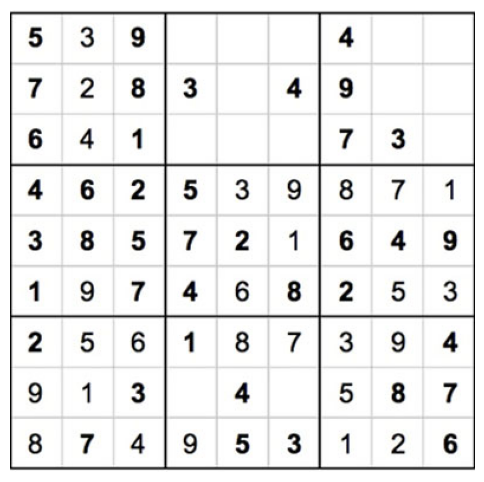

In [8]:
cropImg = rgbImg[5:396, 3:396]

fn_plot_one_img(cropImg)

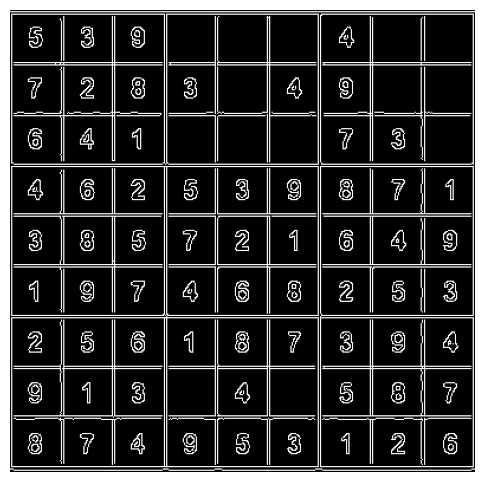

In [9]:
# Gray Image
grayImg = cv2.cvtColor(cropImg,cv2.COLOR_BGR2GRAY)

# Get Canny images
cannyImg = cv2.Canny(grayImg, 20, 100, apertureSize = 3)

fn_plot_one_img(cannyImg ,cmap = 'gray')

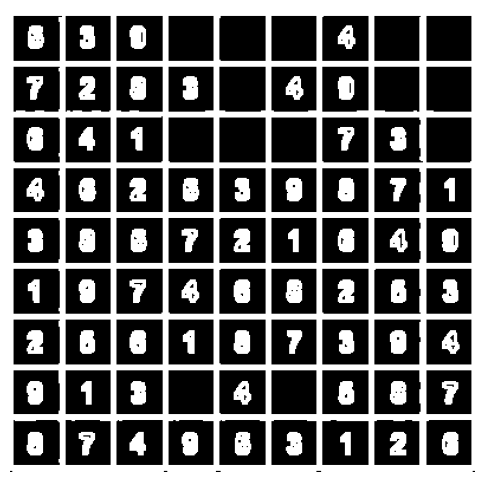

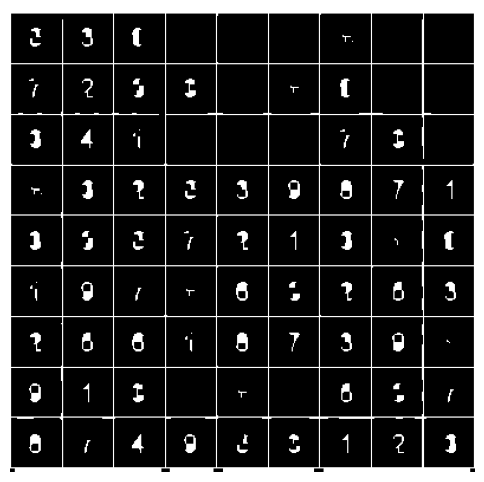

In [10]:
# Dilating using a 3 x 3 Kernel
kernel = np.ones((3,3),np.uint8)
dilatedImg = cv2.dilate(cannyImg,kernel,iterations = 1)

# Eroding the image
kernel = np.ones((5,5),np.uint8)
erodedImg = cv2.erode(dilatedImg,kernel,iterations = 1)

img_list = [{'img': cannyImg, 'name': 'Canny', 'cmap': 'gray'}, 
            {'img': dilatedImg, 'name': 'Dilated Image', 'cmap': 'gray'}, 
            {'img': erodedImg, 'name': 'Eroded Image', 'cmap': 'gray'}]

#fn_plot_images(img_list)

fn_plot_one_img(dilatedImg, cmap = 'gray')

fn_plot_one_img(erodedImg, cmap = 'gray')


## Parameters
- image:	8-bit, single-channel binary source image. The image may be modified by the function.
- lines:	Output vector of lines. Each line is represented by a 2 or 3 element vector (ρ,θ) or (ρ,θ,votes), where ρ is the distance from the coordinate origin (0,0) (top-left corner of the image), θ is the line rotation angle in radians ( 0∼vertical line,π/2∼horizontal line ), and votes is the value of accumulator.
- rho:	Distance resolution of the accumulator in pixels.
- theta:	Angle resolution of the accumulator in radians.
- threshold:	Accumulator threshold parameter. Only those lines are returned that get enough votes ( >threshold ).
- srn:	For the multi-scale Hough transform, it is a divisor for the distance resolution rho. The coarse accumulator distance resolution is rho and the accurate accumulator resolution is rho/srn. If both srn=0 and stn=0, the classical Hough transform is used. Otherwise, both these parameters should be positive.
- stn:	For the multi-scale Hough transform, it is a divisor for the distance resolution theta.
- min_theta:	For standard and multi-scale Hough transform, minimum angle to check for lines. Must fall between 0 and max_theta.
- max_theta:	For standard and multi-scale Hough transform, an upper bound for the angle. Must fall between min_theta and CV_PI. The actual maximum angle in the accumulator may be slightly less than max_theta, depending on the parameters min_theta and theta.

number of Hough lines: 20


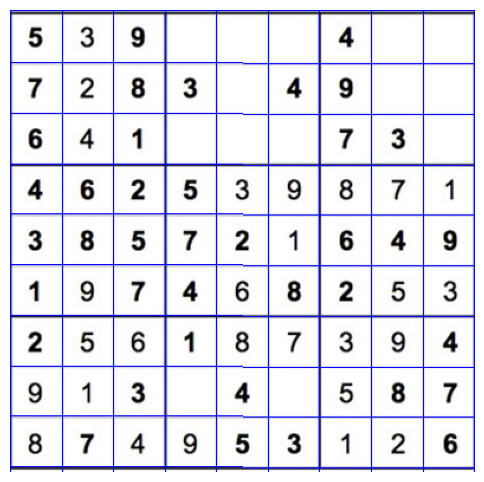

In [11]:
lines = cv2.HoughLines(erodedImg,1,np.pi/180,300)
print('number of Hough lines:', len(lines))

houghImg = cropImg.copy()

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(houghImg,(x1,y1),(x2,y2),(0,0,255),1)

fn_plot_one_img(houghImg)

## Harris Corner Detection

Harris Corner detection algorithm identifies the internal corners of an image. The corners of an image are identified as the regions in which there are variations in large intensity of the gradient in all possible dimensions and directions. Corners extracted can be a part of the image features, which can be matched with features of other images, and can be used to extract accurate information. Harris Corner Detection is a method to extract the corners from the input image and to extract features from the input image. 

### Parameters
- img - Input image. It should be grayscale and float32 type.
- blockSize - It is the size of neighbourhood considered for corner detection
- ksize - Aperture parameter of the Sobel derivative used.
- k - Harris detector free parameter in the equation.


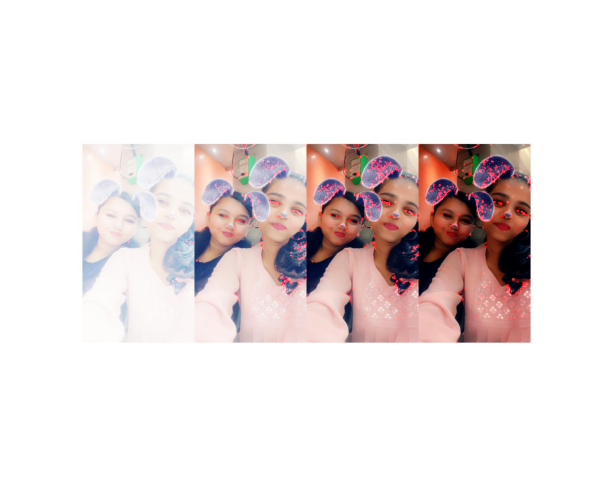

In [14]:
imgFileName = '/home/hpcap/Desktop/modules/Ai/Data/input-20240618T113733Z-001/input/basic_operations/bright_image.jpeg'

srcImg, rgbImg = fn_read_image(imgFileName)

# convert the input image into
# grayscale color space
grayImg = cv2.cvtColor(rgbImg, cv2.COLOR_BGR2GRAY)
grayImg = np.float32(grayImg)

# Find Harris corners
dst = cv2.cornerHarris(grayImg, 2, 5, 0.07)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# make copy of source

harImg = rgbImg.copy()

# Threshold for an optimal value, it may vary depending on the image.
harImg[:,:, 0][dst>0.001*dst.max()]=255

fn_plot_one_img(harImg)

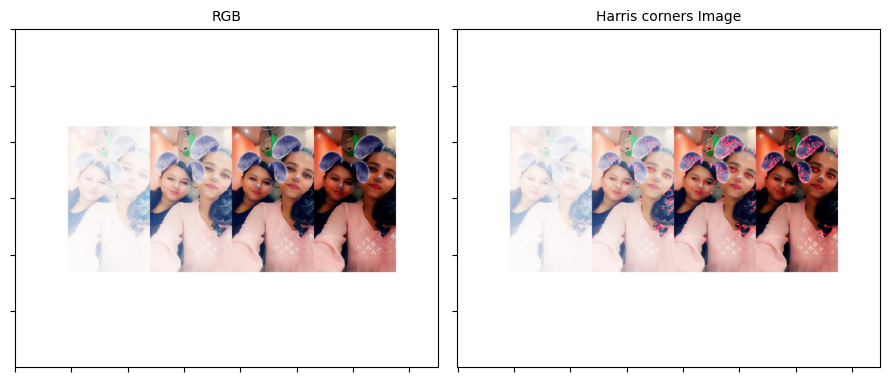

In [15]:
img_list = [{'img': rgbImg, 'name': 'RGB', 'cmap': 'gray'},
            {'img': harImg, 'name': 'Harris corners Image', 'cmap': 'gray'}]

fn_plot_images(img_list)